# House Price Prediction project

Let's import all the usefull library for this project:

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Loading Data Set

Let's load our dataset in memory: 

In [2]:
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)

Let's look at the data

In [3]:
all_data.shape

(2919, 81)

In [4]:
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [5]:
missing_values = (all_data.isnull().sum() / len(all_data)) * 100
missing_values = missing_values.drop(missing_values[missing_values == 0].index).sort_values(ascending=False)
missing_values.head(30)

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
SalePrice       49.982871
FireplaceQu     48.646797
LotFrontage     16.649538
GarageCond       5.447071
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
Functional       0.068517
BsmtHalfBath     0.068517
BsmtFullBath     0.068517
Utilities        0.068517
KitchenQual      0.034258
TotalBsmtSF      0.034258
BsmtUnfSF        0.034258
GarageCars       0.034258
GarageArea       0.034258
BsmtFinSF2       0.034258
dtype: float64

In [6]:
is_nan = all_data['LotFrontage'] == 0


# Data Analysis

Let's list all the features that contains outliers or missing values:

- Missing values: Alley, MasVnrType,BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FirePlaceQu, GarageType, GarageFinish, GarageQual, GarageCond
- Potential outliers:  LotFrontage, MasVnrArea, GarageYrBlt

 


### Missing Values

We will go through each feature and try to get a better understanding as to why they have missing values.

PoolQc - Pool Quality

PoolQc may have a lot of missing values because it is hard to determine the quality of the pool. Also, because it is common for houses to not have pools.

Alley - Type of Alley access

A lot of data is missing for the alley feature because there may not be alleys accessible to the house.

MiscFeature - Miscellaneous feature not covered in other categories

Most houses may not have features that aren't already cvered in other categories.

Fence - Fence Quality

A lot of houses do not have fences surrounding them. A good example is row houses. So the missing values of fences could be because there were no fences in the houses to begin with.

FirePlaceQu - Fire Place Quality

Missing values here are labeled as nan ,  which was used to indicate houses with no fireplace. In this case, they were not missing values instead they represented 0 values.

Lot Frontage - Linear feet of street connected to property


GarageType - Garage Location

This feature is easy to describe and categorize since it depends on the garage location whether it is builtin, attached to the house, basement garage or detached from the house. So, If there are any missing values then it is because there is no garage in the house.

GarageYrBlt - Year garage was built

Missing values would be because the data for when the garage was built could not be found/determined.

GarageFinish - Interior finish of the garage

Garage Interior finish was categorized into finished, roughly finished, unfinished and no garage. Data values with NA/NaN values indicate that the house does not have a garage.

GarageQual - Garage Quality ,  GarageCond. - Garage Condition.

Similar to GarageFinish, the missing values in both GarageQual and GarageCond may indicate the absence of a garage in a house.

Bsmt Exposure - Refers to walkout or garden level wall

Some houses have no exposure in their basements and others have no basements. Missing values could be due to either of the two.

BsmtFinType2 - Rating of basement finished area (if multiple types)






### Potential Outliers

We will Plot all the Features with Potential Outliers. 

Starting with LotFrontage.

LotFrontage stands for  Linear feet of street connected to property

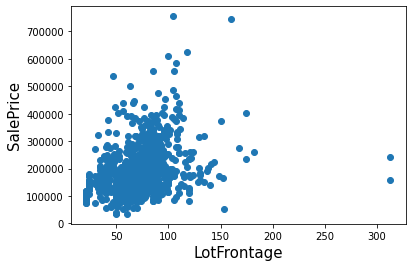

In [7]:
plt.scatter(x = all_data['LotFrontage'], y = all_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('LotFrontage', fontsize=15)
plt.show()

From the plot, most of the values are compacted between the 0 and 150 values of LotFrontage measurement. 

It shows a general trend of SalePrice gradually increasing as the LotFrontage increases with some outliers as the Lot Frontage increases above 150.

In [8]:
all_data[all_data["LotFrontage"] > 250]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000.0
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000.0


Let's plot another feature with potential outliers; MasVnrArea.

MasVnrArea stands for Masonry veneer area in square feet. 

Masonry Veneer is a nonstructural facing of brick, stone, concrete masonry or other masonry material securely attached to a wall or backing. 

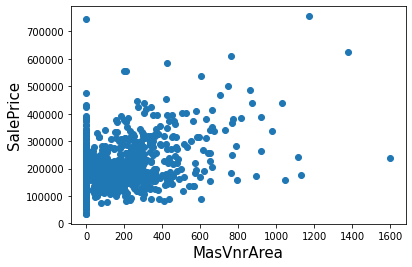

In [9]:
plt.scatter(x = all_data['MasVnrArea'], y = all_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('MasVnrArea', fontsize=15)
plt.show()

Another potential outlier is the feature GarageYrBlt. We will plot this as well to see the relationship between SalePrice and Year when the garage was built.

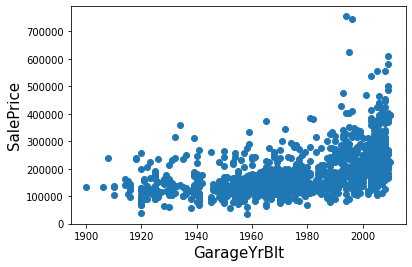

In [10]:
plt.scatter(x = all_data['GarageYrBlt'], y = all_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GarageYrBlt', fontsize=15)
plt.show()

### Higher Correlations

We will analyse all features that have higher correlatins to the SalePrice.

In [11]:
correlation = train.corr().abs()
correlation[correlation > 0.5]["SalePrice"]

Id                    NaN
MSSubClass            NaN
LotFrontage           NaN
LotArea               NaN
OverallQual      0.790982
OverallCond           NaN
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea            NaN
BsmtFinSF1            NaN
BsmtFinSF2            NaN
BsmtUnfSF             NaN
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF              NaN
LowQualFinSF          NaN
GrLivArea        0.708624
BsmtFullBath          NaN
BsmtHalfBath          NaN
FullBath         0.560664
HalfBath              NaN
BedroomAbvGr          NaN
KitchenAbvGr          NaN
TotRmsAbvGrd     0.533723
Fireplaces            NaN
GarageYrBlt           NaN
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF            NaN
OpenPorchSF           NaN
EnclosedPorch         NaN
3SsnPorch             NaN
ScreenPorch           NaN
PoolArea              NaN
MiscVal               NaN
MoSold                NaN
YrSold                NaN
SalePrice        1.000000
Name: SalePr

From the list generated above, features that have higher correlations(greater than 0.5) are:-

OverallQual, YearBuilt, YearRemodAdd, TotalBsmntSF, 1stFloorSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, and GarageArea

Let's first analyse the GrLivArea feature:

GrLivArea - Ground Living area in the house

Ploting GrLivArea with SalePrice to look at the data distribution.

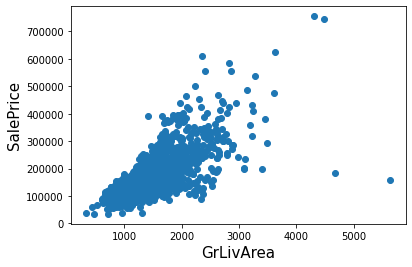

In [12]:
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

From the scatter plot, SalePrice seems to increase as the GrLivArea increases, A Linear relationship: With an exception of a few values with GrLivArea greater than 4000 that show a different behavior(outliers). 

While cleaning the data, we will remove the outliers to minimize errors in the model.

Our next plot will be a scatterplot of SalePrice against the GarageCars 

They have a correlation of approx. 0.64

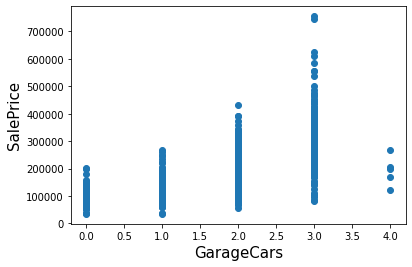

In [13]:
plt.scatter(x = train['GarageCars'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GarageCars', fontsize=15)
plt.show()

The nature of the plot does not give us a lot of information that can be analyzed.

A general trend of Sale Price increasing as the number of GarageCars increases is seen as we expected. With a few outliers from the position 4 of GarageCars. The outliers indicate that there may be other factors affecting the sale price.

Let us create a box plot instead to get a better understanding of the data from GarageCars and SalePrice.

In [14]:
import seaborn as sns

def create_frequency_chart(data, x_axis, category, is_categorical = False, ticks = 10):
    new_data = data.copy()
    if not is_categorical:
        buket_size = max(new_data[x_axis].values) / ticks
        bins = [i * buket_size for i in range(ticks)]
        new_data["buckets"] = pd.cut(new_data[x_axis], bins)

    #Try to fill the code when the x_axis is not continuous

    sns.catplot(x="buckets", kind="count", data=new_data, hue=category, aspect=5)

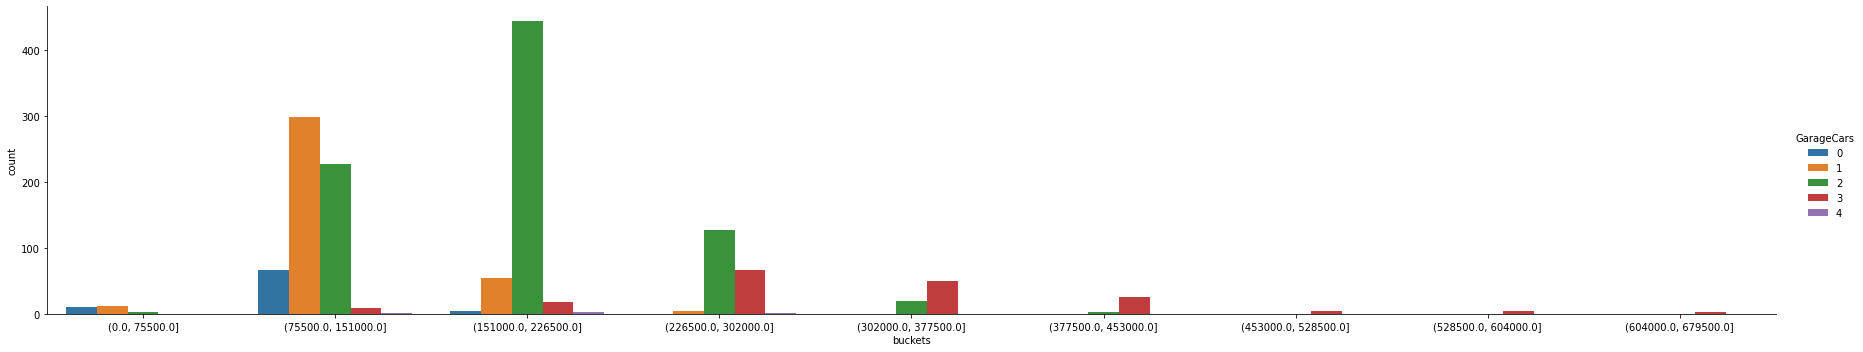

In [15]:
create_frequency_chart(train, "SalePrice", "GarageCars")

From the boxplot above, there a few observations seen.

The plot shows its common for houses within the price range [75500, 151000] to have two garage cars. More than 400 were counted.

Also, there seems to be a fair amount of houses with 3 garage cars when the saleprice is >200,000.

As the price range increases, the number of houses with garage cars decreases. So does this mean expensive houses do not have built in garages or maybe data has recorded less houses within the more expensive price range? 


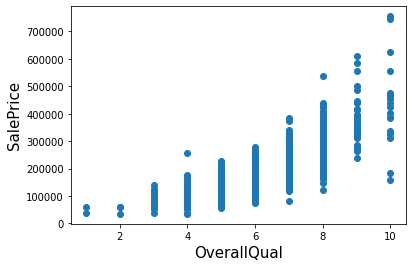

In [16]:
plt.scatter(x = train['OverallQual'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('OverallQual', fontsize=15)
plt.show()

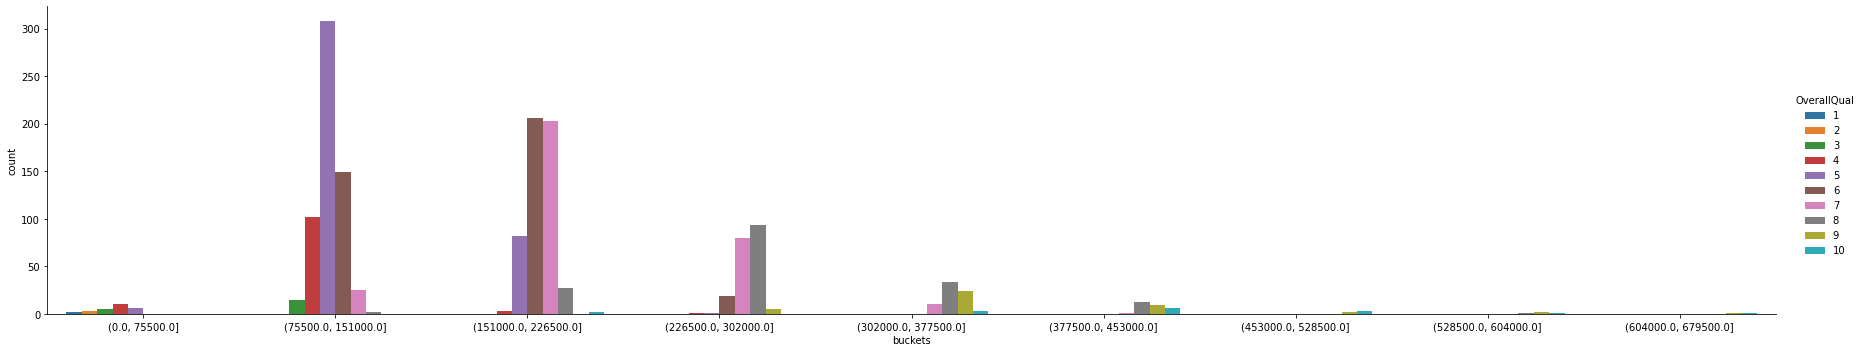

In [17]:
create_frequency_chart(train, "SalePrice", "OverallQual")

Our next plot will be a scatterplot of SalePrice against the TotalBsmtSF Feature 


TotalBsmtSF: Total square feet of basement area

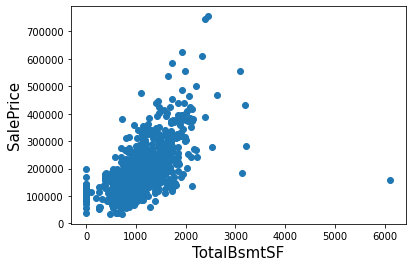

In [18]:
plt.scatter(x = train['TotalBsmtSF'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('TotalBsmtSF', fontsize=15)
plt.show()

Let's expand the graph a bit more so we can see a clearer pattern from the plot. We will use data_sample

In [19]:
data_sample = train[(train['TotalBsmtSF'] < 2000) & (train['TotalBsmtSF'] > 0)]


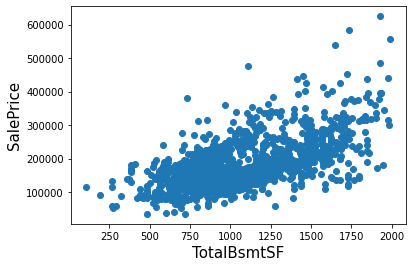

In [20]:
plt.scatter(x = data_sample['TotalBsmtSF'], y = data_sample['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('TotalBsmtSF', fontsize=15)
plt.show()

Now we will look at the 1stFlrSF Feature. 

Will be interesting to see how the square footage of the first floor may affect sale price of a house.

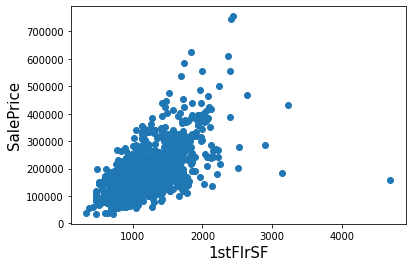

In [21]:
plt.scatter(x = train['1stFlrSF'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('1stFlrSF', fontsize=15)
plt.show()

1stFlrSF - First Floor Square Footage

From the scatterplot, there are a few outliers which do not follow the general trend: Sale Price increases as the 1stFlrSF increases; A positive Linear Relationship.

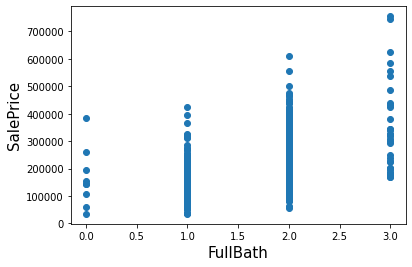

In [22]:
plt.scatter(x = train['FullBath'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('FullBath', fontsize=15)
plt.show()

From the scatter plot, it is hard to determine if there is any trend or how the FullBath Feature affects the sale Price.

### Correlation Matrix

We will create a correlation matrix to represent the correlation between features.

For data scientists, checking correlations is an important part of the exploratory data analysis process. This is one of the methods used to decide which features affect the target variable the most, and in turn, get used in predicting this target variable.

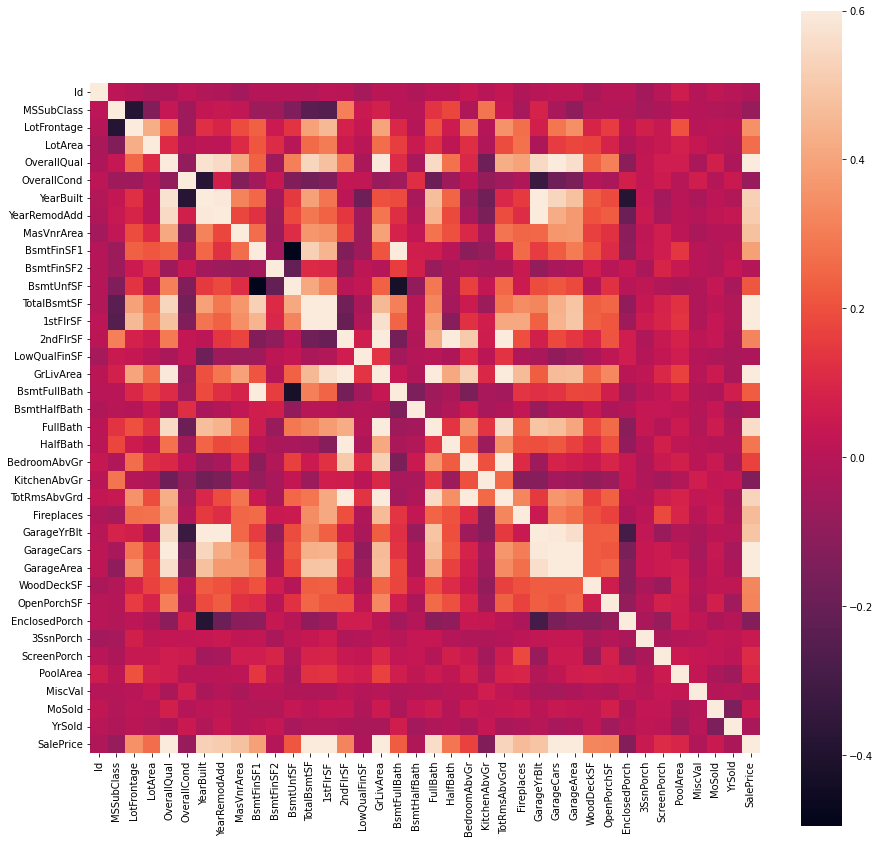

In [23]:
#A .corr() method will be added to the data and passed as the first argument.
#An argument called annot=True helps display the correlation coefficient(deleted for better visualization)
#A good trick used to reduce the number displayed and improve readability: fmt =’.3g'or fmt = ‘.1g' 
#The next 3 arguments are for rescaling the colorbar.
#vmin is the minimum value of the bar; vmax is the maximum value of the bar; and center
#Changing shape of matrixes into squares using square = True

plt.subplots(figsize=(15, 15))

sns.heatmap(train.corr(), fmt = '.2g', vmax = .6, square = True);



### SalePrice Correlation Matrix

In [24]:
train["GarageYrBlt"]

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

We will specifically check for the correlation between saleprice and other features.

<AxesSubplot:>

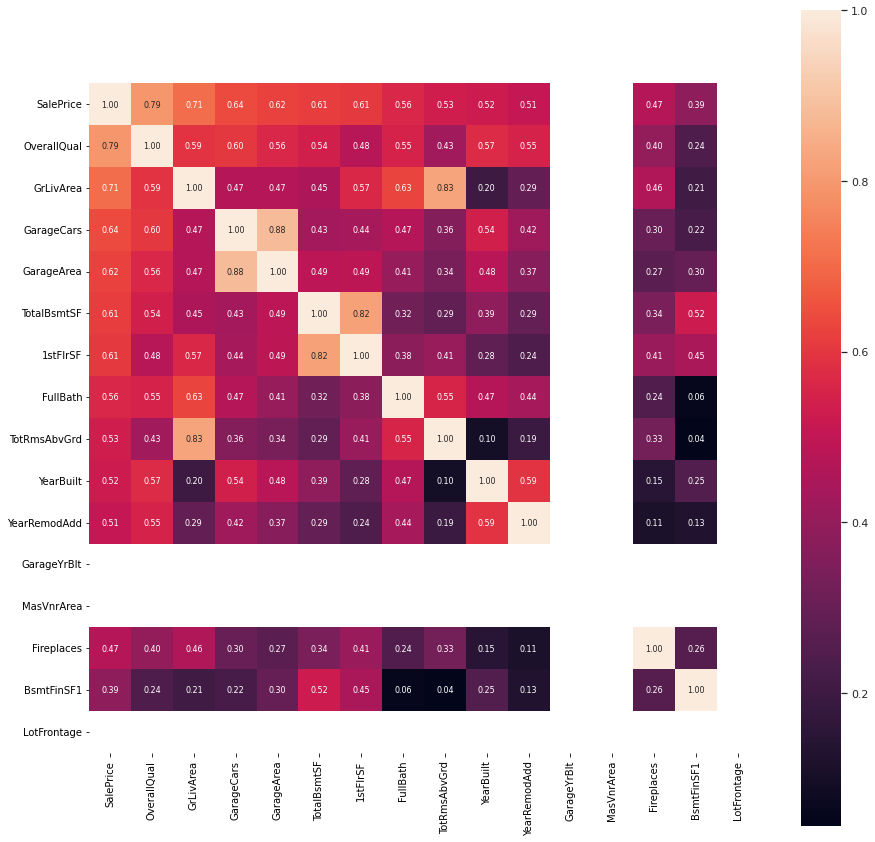

In [25]:
plt.subplots(figsize=(15, 15))
k = 16 #number of variables for heatmap
corrematrix = train.corr()
cols = corrematrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale= 1)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)


The SalePrice correlation matrix brings a clearer picture of what we discussed regarding correlations above.

A new observation is made from the matrix:

'GarageCars' and 'GarageArea' are  strongly correlated variables. They also have approximately similar correlations with other features throughout the matrix. This could be because  the number of cars that fit into the garage is a consequence of the garage area. They are interrelated. 


# Data Cleaning

In [26]:
all_data.shape

(2919, 81)

Now we will remove the outliers from the features plotted above

Starting with the GrLivArea Feature

In [27]:
all_data = all_data.drop(all_data[(all_data['GrLivArea'] > 4000) & (all_data['SalePrice'] < 250000)].index)

LotFrontage

We will drop LotFrontage x- values greater than 250 since they are outliers

In [28]:
all_data = all_data.drop(all_data[(all_data['LotFrontage'] > 250) & (all_data['SalePrice'] < 300000)].index)

In [29]:
all_data.shape

(2916, 81)

MasVnrArea

The 0 x-values were very congested, we will remove them to see a better visualization of the plot

We will also remove the 1600 x-value since it is an outlier

In [30]:
all_data = all_data.drop(all_data[(all_data['MasVnrArea'] > 1500) ].index)

In [31]:
all_data = all_data.drop(["Id"], axis=1)

In [32]:
all_data.shape

(2915, 80)

### Inputing Missing Values

PoolQC : data description says NA means "No Pool". 

Which make sense because of the huge ratio of missing value (+99%) and also because not every house has a pool. 

This case is similar for MiscFeature, Alley, Fence, and FirePlaceQu

We will replace all NA values with None so they are not considered missing values.

In [33]:
cols = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"]

for col in cols:
    all_data[col] = all_data[col].fillna("None")

We will also replace GarageType, GarageFinish, GarageQual and GarageCond missing data with None.

In [34]:
for value in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[value] = all_data[value].fillna('None')

GarageArea and GarageCars are numerical variables. Missing values for these features may indicate that the house has no Garage.

Therefore we will replace missing values with 0. To indicate no(0) GarageArea and 0 number of garage cars

In [35]:
for value in ('GarageArea', 'GarageCars'):
    all_data[value] = all_data[value].fillna(0)

BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath:

Missing values in these numerical basement features are more likely because the house has no basement.Therefore we will replace them with 0.

In [36]:
for value in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[value] = all_data[value].fillna(0)

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 

These are categorical basement-related features, NaN means that there is no basement so we will replace them with None.

In [37]:
for value in ('BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[value] = all_data[value].fillna(0)

Let's update the missing values from 'LotFrontage' and 'MasVnrArea'. 

Since they are numerical features, we will replace missing values with zeros(0)

In [38]:
all_data["LotFrontage"] = all_data["LotFrontage"].fillna(0)
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)


# Data Engineering

We will create a new feature called TotalSF by adding the features: bsmtSF + 1stFlrSF + 2ndFlrSF  and then check how it relates to SalePrice

TotalSF will represent the total square footage of the house.

In [39]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

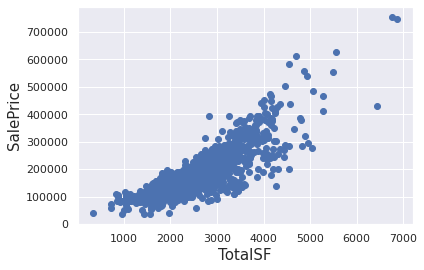

In [40]:
plt.scatter(x = all_data['TotalSF'], y = all_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('TotalSF', fontsize=15)
plt.show()

From the Plot, SalePrice seems to increase as the TotalSF increases. One value at TotalSF = 7000(Approx.) seems to be a bit higher and far from the rest. I assume it could be because some of the square footage is a great vegetation/garden area or has interesting features within the house.

For instance most houses with huge square footage would have themed basements as a pool table area or some sort of underground bar.

### Variable Transformation

Some categorical variables are regarded as numerical features. We will transform them into categorical data.

MsSubClass - The Building Class

Building class usually denotes the general condition of a commercial property and indicates quality of location and amenities.

So this is a category.

Changing overall condition into categorical data

Transforming YrSold and MoSold as well because the year or month is a mere category, it does not signify anything else numerically. Cannot be measured.

In [41]:
cols = ["MSSubClass","OverallCond", "YrSold", "MoSold"]

for col in cols:
    all_data[col] = all_data[col].apply(str)

### OneHotEncoder

What one hot encoding does is, it takes a column which has categorical data, which has been label encoded, and then splits the column into multiple columns. The numbers are replaced by 1s and 0s, depending on which column has what value.

### Label Encoding

Label Encoding - changes categorical data or text to be represented numerically.

So we will transform categorical data into numerical data before applying the models. Starting with MSZoning

In [42]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
all_data["MSZoning"] = labelencoder.fit_transform(all_data["MSZoning"])


We will label encode other categorical features together by creating a list and using a for loop.

In [43]:
cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'GarageYrBlt']
for col in cols:
    all_data[col] = LabelEncoder().fit_transform(list(all_data[col].values))

In [44]:
all_data = pd.get_dummies(all_data)

In [45]:
train = all_data[~all_data["SalePrice"].isna()]
test = all_data[all_data["SalePrice"].isna()]

Now we will check if there are more missing values in any of the features.

In [46]:
test[test.isna().any(axis=1)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,5,2,80.0,11622,1,1,3,0,5,5,...,0,0,0,1,0,0,0,0,1,0
1461,5,3,81.0,14267,1,1,0,0,6,5,...,0,0,0,1,0,0,0,0,1,0
1462,10,3,74.0,13830,1,1,0,0,5,4,...,0,0,0,1,0,0,0,0,1,0
1463,10,3,78.0,9978,1,1,0,0,6,5,...,0,0,0,1,0,0,0,0,1,0
1464,0,3,43.0,5005,1,1,0,0,8,4,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2,4,21.0,1936,1,1,3,0,4,6,...,0,0,0,1,0,0,0,0,1,0
2915,2,4,21.0,1894,1,1,3,0,4,4,...,0,0,0,1,1,0,0,0,0,0
2916,5,3,160.0,20000,1,1,3,0,5,6,...,0,0,0,1,1,0,0,0,0,0
2917,14,3,62.0,10441,1,1,3,0,5,4,...,0,0,0,1,0,0,0,0,1,0


In [47]:
x_train = train.drop(["SalePrice"], axis=1)
y_train = train["SalePrice"].values
x_test = test.drop(["SalePrice"], axis=1)

### Train and Test Split

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

It is appropriate when you have a very large dataset, a costly model to train, or require a good estimate of model performance quickly.

It is good to choose a split percentage that meets the project’s objectives with considerations of:
Computational cost in training and evaluating the model as well as the Training and Test set representativeness.

Another important consideration is that rows are assigned to the train and test sets randomly. This is doe by setting the “random_state” to an integer value.

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

# Model Design


Research and summarize 4 models:
- Summary of the model
- Advantages and drawbacks
- Train and predict the validation data
- Look at the feature importance, create evaluation matrices
- Select the final model and explain why you picked it

For performance metrics, refere to https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

- Tree based model (Look at random forest as well): https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py


- Linear Regression (with regularization, Lasso and Ridge): https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression

- Xgboost (Extension of Tree based model): https://towardsdatascience.com/xgboost-python-example-42777d01001e?gi=37505fc61178

- Multilayer Perceptron networkv (optional): https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

### Linear Regression(with regularization, Lasso and Ridge)

Summary of the Model

    - Uses Ordinary Least Squares

    - Linear model with coefficients that minimize the residual some of squares between observed and predicted targets.

Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.

Ridge Regression; - In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.

Ridge Regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity. Ridge estimates sparse coefficients with l2 regularization

Least Absolute Shrinkage And Selection Operator regularization (LASSO)

In Lasso Regression, the main difference is that instead of  taking the square of the coefficients, magnitudes are taken into account. Lasso estimates sparse coefficients with l1 regularization

The Lasso is a shrinkage and selection method for linear regression. An L1 penalty minimizes the size of all coefficients and allows any coefficient to go to the value of zero, effectively removing input features from the model.

Lasso Regression helps in feature selection and reducing overfitting.

The computation of the lasso solutions is a quadratic programming problem, and can be tackled by standard numerical analysis algorithms.

### Ridge

Parameters used in Ridge Regression

alpha(float,  default=1.0)

Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization. 

fit_intercept (bool, default=True) 

Used to fit the intercept for this model. If set to false, no intercept will be used in calculations (i.e. X and y are expected to be centered).

normalize (bool, default=False)

This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use StandardScaler before calling fit on an estimator with normalize=False.

max_iter (int, default=None)

Refers to the Maximum number of iterations for conjugate gradient solver. For ‘sparse_cg’ and ‘lsqr’ solvers, the default value is determined by scipy.sparse.linalg. 

tol (float, default=1e-3)

Precision of the solution.



In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [50]:
ridgeReg = Ridge(alpha=5,  fit_intercept=True, normalize='deprecated', copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)

In [51]:
ridgeReg = ridgeReg.fit(X_train, y_train)
pred_val = ridgeReg.predict(X_val)
from sklearn.metrics import max_error
print(f"Maximum error in Ridge Regression is: {max_error(y_val, pred_val)}")

Maximum error in Ridge Regression is: 143684.88989007764


In [52]:
from sklearn.metrics import r2_score

r2_score(y_val, pred_val)

0.8937202112149368

In [53]:
#Feature importance

features = pd.DataFrame({"feature": ridgeReg.feature_names_in_, "importance": ridgeReg.coef_})
features.sort_values("importance", ascending=False).head()
print(f"{len(features[features['importance'] != 0])} are used in the model")

216 are used in the model


### Lasso

In [54]:
from sklearn.linear_model import Lasso

In [55]:
LassoReg = Lasso(alpha=20, fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [56]:
LassoReg = LassoReg.fit(X_train, y_train)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.793e+10, tolerance: 7.340e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [57]:
predict_val = LassoReg.predict(X_val)
from sklearn.metrics import max_error
print(f"Maximum error in Lasso Regression is {max_error(y_val, predict_val)}")


Maximum error in Lasso Regression is 140236.55699299066


In [58]:
from sklearn.metrics import r2_score

r2_score(y_val, predict_val)

0.8909372399118394

In [59]:
#Feature importance

features = pd.DataFrame({"feature": LassoReg.feature_names_in_, "importance": LassoReg.coef_})
features.sort_values("importance", ascending=False).head()
print(f"{len(features[features['importance'] != 0])} are used in the model")

159 are used in the model


### Tree Based Model

Regression trees are type of decision trees since the set of splitting rules used to segment the
predictor space can be summarized in a tree. 

In a regression tree, each leaf represents a numerical value.
Value that brings the least residual becomes the root of the tree

These involve stratifying or segmenting the predictor space into a number of simple regions.

Decision trees are typically drawn upside down, in the sense that the leaves are at the bottom of the tree.

The points along the tree where the predictor space is split are referred to as internal nodes.

Random Forest method grows multiple trees which are combined to yield a single consesus prediction.


Advantages and Disadvantages

    - They are simple and useful for interpretation.

    - Trees can easily handle qualitative predictors without the need to create dummy variables.

    - Combining a large number of trees can often result in dramatic improvements in prediction accuracy, at the expense of some loss interpretation.

    - In terms of prediction accuracy, they are not competitive with the best learning approaches.

Bagging, is a general-purpose procedure for reducing the variance of a statistical learning method.

Random forests provide an improvement over bagged trees by way of a small tweak that decorrelates the trees. This reduces the variance when we average the trees.

Similar to bagging, in random forests we build a number of decision trees in bootstrapped training samples.


Decision Tree Parameters;

-Splitter(default = 'best') ; Is the strategy used to choose a split at each node.'best' chooses the best split and 'random'chooses the best random split.

-Max_depth(default = 'None') ; Refers to the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split.

-min_samples_split(default = 2) ; the minimum number of samples required to split an internal node.

-min-samples_leaf(default = 1) ; The minimum number of samples required to be at a leaf node.

-min_weight_fraction_leaf(dedault = 0.0) ; The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

-max_features(default = 'None') ; refers to the maximum number of features to be considered when looking for the BEST Split.

-random_state(default = 'None') ; controls the randomness of an estimator. 

-min_impurity_decrease(default = 0.0) ; this parameter makes a node to be split if the split brings about a decrease of the impurity.

ccp_alpha(default = 0.0) ; Complexity parameter used for Minimal Cost-Complexity Pruning(an algorithm used to prune a tree to avoid over-fitting). The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed. 

Classification is a type of supervised machine learning problem where the target (response) variable is categorical.

Given the training data, which contains the known label, the classifier approximates a mapping function (f) from the input variables (X) to output variables (Y).

In [60]:
from sklearn.tree import DecisionTreeRegressor


clf = DecisionTreeRegressor(splitter='best', max_depth=400, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)

Let's fit our model

In [61]:
clf = clf.fit(X_train, y_train)
pred_val = clf.predict(X_val)

We will check the feature importnce and see how many featires are used in the model

In [62]:
#Feature importance

features = pd.DataFrame({"feature":train.drop(["SalePrice"], axis=1).columns, "importance": clf.feature_importances_})
print(f"{len(features[features['importance'] != 0])} are used in the model")

134 are used in the model


In [63]:
features.sort_values("importance", ascending=False)

,feature,importance
8,OverallQual,0.489806
59,TotalSF,0.332379
22,BsmtUnfSF,0.014851
37,TotRmsAbvGrd,0.012615
43,GarageCars,0.011704
...,...,...
93,Neighborhood_StoneBr,0.000000
143,Exterior1st_CBlock,0.000000
141,Exterior1st_BrkComm,0.000000
138,RoofMatl_WdShngl,0.000000


We will evaluate our model perfomance by calculating the errors and r2_score of the model

In [64]:
from sklearn.metrics import mean_squared_error
print(f"Mean Squared Error in Decision Tree Regressor is {mean_squared_error(y_val, pred_val)}")

Mean Squared Error in Decision Tree Regressor is 1022058207.0445205


In [65]:
print(f"Maximum error in Decison Tree Regression is {max_error(y_val, pred_val)}")

Maximum error in Decison Tree Regression is 238750.0


r2_score

-It is the Coefficient of determination , used to evaluate the performance of a model.

Best score is 1.0 and least could be 0.

In [66]:
from sklearn.metrics import r2_score

r2_score(y_val, pred_val)

0.8386490379072654

A score of 0.863... indicates there is some good perfomance in the model as it is closer to 1.0, the best score.

### XGBoost

XGBoost is a short term for Extreme Gradient Boost. 

The values in each leaf are the residuals. That is, the difference between the prediction and the actual value of the independent variable, and not the sample of the dependent variable.

Gain is the improvement in accuracy brought about by the split. The split that is done by linear scanning.

After calculating the gain, the optimal threshold is the threshold with maximum gain.

Note: When the gain is negative, it implies that the split does not yield better results than would otherwise have been the case had we left the tree as it was.

Advantages and Disadvantages.

    - Great for supervised learning

    - Difficult to interpret the results.

In [67]:
!pip install xgboost==1.5.0

     |████████████████████████████████| 173.5 MB 63 kB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [68]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Now we will intialize an instance of XGBRegressor Class. 

We will also choose the number of estimators, maximum depth, as well as the values of lambda and gamma

In [69]:
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

XGBoost has a few parameters that can dramatically affect the model's accuracy and training speed

n_estimators: specifies how many times to go through the modeling cycle.

    Too low a value causes underfitting, which is inaccurate predictions on both training data and new data. Too large a value causes overfitting, which is accurate predictions on training data, but inaccurate predictions on new data (which is what we care about). Typical values range from 100-1000.

Then we build and fit a model just like we did with Lasso and Ridge

In [70]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Let's check the relative importance attributed to each feature, in determining the price of the house.

In [71]:
#Feature Importance

features = pd.DataFrame({"feature":train.drop(["SalePrice"], axis=1).columns, "importance": xgb_model.feature_importances_})
print(f"{len(features[features['importance'] != 0])} are used in the model")


100 are used in the model


This model however uses way less features compared to Lasso and Ridge. It is important to tweek the attributes and see how it can be improved

In [72]:
features.sort_values("importance", ascending=False)

,feature,importance
8,OverallQual,0.253260
59,TotalSF,0.239036
35,KitchenAbvGr,0.069747
43,GarageCars,0.049925
36,KitchenQual,0.042200
...,...,...
111,Condition2_RRAn,0.000000
110,Condition2_RRAe,0.000000
108,Condition2_PosA,0.000000
107,Condition2_Norm,0.000000


From the xgb model, The Overall Quality and The Total Square Footage of the house are the factors which highly determine its price. This makes sense because when people are trying to get a house they keenly consider quality and house size to be determining factors.

Thereafter we evaluate the model and make predictions

In [73]:
predict_val = xgb_model.predict(X_val)

We can use the mean squared error, maximum error and r2_score to evaluate the model performance. The mean squared error is the average of the differences between the predictions and the actual values squared.

In [74]:
mean_squared_error(y_val, predict_val)

492567224.8908863

In [75]:
predict_val = xgb_model.predict(X_val)
print(f"Maximum error in XGBoost model is {max_error(y_val, predict_val)}")
print(f"The r2_score is {r2_score(y_val, predict_val)}")

Maximum error in XGBoost model is 101601.8125
The r2_score is 0.9222390710394922


Maximum error here is about twice as small compared to the max error in Decision Tree Regressor

The r2_score is also the highest compared to all other models.

Let's twist the n_estimators parameter using early_stopping_rounds and see if it improves our model.

    The argument early_stopping_rounds offers a way to automatically find the ideal value. Early stopping causes the model to stop iterating when the validation score stops improving, even if we aren't at the hard stop for n_estimators. 

In [76]:
xgb_model = xgb.XGBRegressor(n_estimators=500)
xgb_model.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_val, y_val)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [77]:
predict_val = xgb_model.predict(X_val)
print(f"Maximum error in XGBoost model is {max_error(y_val, predict_val)}")
print(f"The r2_score is {r2_score(y_val, predict_val)}")

Maximum error in XGBoost model is 114032.375
The r2_score is 0.9218814546293783


So in our case, increasing the n_estimators led to an increase in maximum error and a decrease in r2_score.

### Skewness of Data

Skewness measures the shift of the distribution from the normal bell curve.

Positive skew value denotes right shift whereas negative skew value denotes left shift.

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


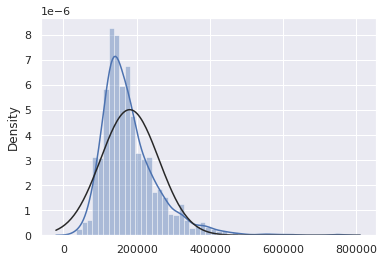

In [92]:

import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #to help us run some statistics

x_train = train.drop(["SalePrice"], axis=1)
y_train = train["SalePrice"].values
x_test = test.drop(["SalePrice"], axis=1)

#Distribution
sns.distplot(y_train , fit = norm);

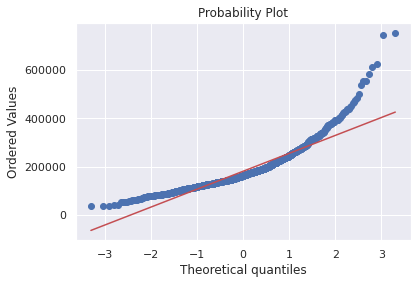

In [93]:
#Let us also check out the QQ-plot
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()

The Q-Q plot, or quantile-quantile plot, is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential.

Notice that the points in our plot form a curve instead of a straight line. Normal Q-Q plots that look like this usually mean the sample data are skewed.

To transform the target Variable 'SalePrice, we will use log transformation.

Log transformation in our case will be done using the  numpy fuction log1p which  applies log(1+x) to all elements of the column

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


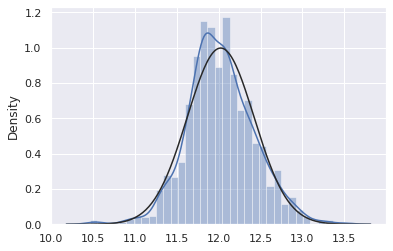

In [94]:
 
y_train_alt = np.log1p(y_train)

#Check the new distribution 
sns.distplot(y_train_alt , fit=norm);

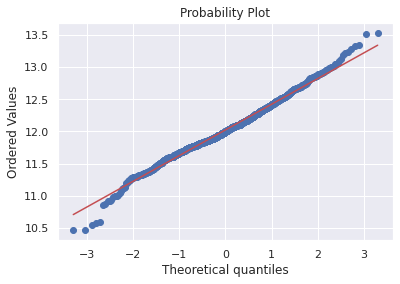

In [95]:
#Let us also check out the QQ-plot
fig = plt.figure()
res = stats.probplot(y_train_alt, plot=plt)
plt.show()

The QQ Plot is more linear, less curvy. 

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train_alt, y_val_alt = train_test_split(x_train, y_train_alt, test_size=0.20, random_state=42)

In [99]:
xgb_model = xgb_model.fit(X_train, y_train_alt)
pred_val = xgb_model.predict(X_val)
print(f"R2_score in Decision Tree Regression is {r2_score(y_val_alt, pred_val)}")

Maximum error in Decison Tree Regression is 0.6297597160689605
R2_score in Decision Tree Regression is 0.8866536786304805


In [102]:
pred_val = np.expm1(pred_val)
print(f"Maximum error in Decison Tree Regression is {max_error(y_val, pred_val)}")

Maximum error in Decison Tree Regression is 133207.0


From the observation above in xgboost model, we see that working on skewness did not improve the performance of the model. 

The model seems to be resistant to the skewness of the data

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dce2ee20-40d8-40b8-af4f-e6174e68a806' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>